<a href="https://colab.research.google.com/github/SUMIT74184/Machine-learning-journey/blob/main/ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Computer Vision & Convolutional Neural Networks ")

Computer Vision & Convolutional Neural Networks 


In [2]:
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor


# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torchvision.__version__)

0.24.0+cu126


## Pytorch Computer Vision libraries

* `TorchVision` - base domain library for Pytorch computer vision
* `torchvision.datasets`- get datasets and data loading functions for computer visions
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transdorms` - function for manipulating your vision data (images) to be suitable for use with an ML model

* `torch.utils.data.Dataset` - Base dataset class for pytorch
* `torch.utils.data.DataLoader` - Creates a python iterable over a dataset

## 1 . Getting a dataset
 FashionMNIST

In [3]:
# Setup training data
train_Data=datasets.FashionMNIST(
    root="data",
    train=True, # do we want the training dataset
    download=True,
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform=None # How do we want to transform the lables/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 177kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.29MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 26.6MB/s]


In [4]:
len(train_Data),len(test_data)

(60000, 10000)

In [5]:
# See the first training example
image,label=train_Data[3]
# image,label

In [6]:
# Finding the name of each class
class_names=train_Data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
# To find the index of each classes
class_to_idx=train_Data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

### 1.1 Check input and output shapes of data

In [8]:
#Check the shape of out image
print(f"Image shape: {image.shape}-> [color_channels,height,width] | class_name:{class_names[label]} | labels:{label}")

Image shape: torch.Size([1, 28, 28])-> [color_channels,height,width] | class_name:Dress | labels:3


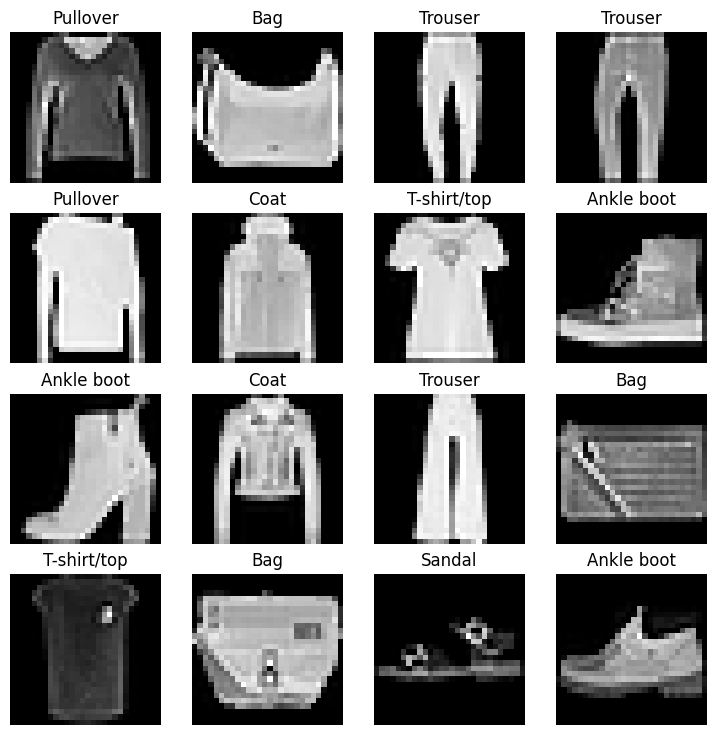

In [9]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_Data),size=[1]).item()
  img,label=train_Data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

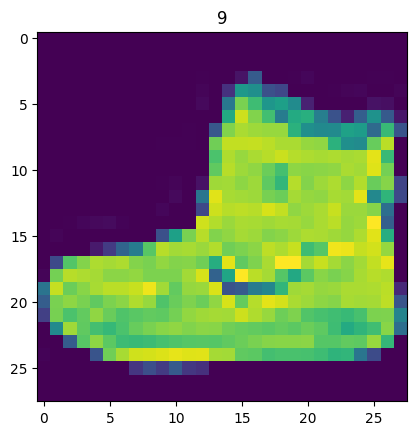

In [10]:
from numpy import squeeze
image,label=train_Data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)
# image

Text(0.5, 1.0, 'Ankle boot')

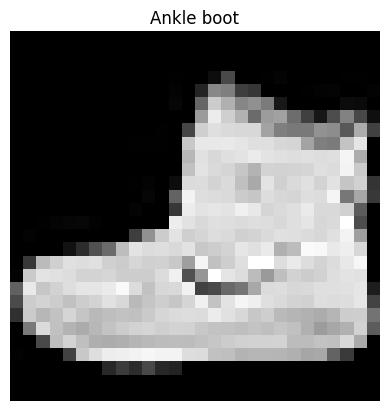

In [11]:
plt.imshow(image.squeeze(),cmap="gray")
plt.axis(False)
plt.title(class_names[label])
# plt.title(label)

Do you think these items of clothing(images) could be modelled with pure linear lines? Or do you think we'll need non-linearlities?

In [12]:
train_Data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

## 2 . Prepare DataLoader
Right now our data is in the form of Pytorch Datasets

DataLoader turns our dataset into python iterable

More specifically, we want to turn our data into batches (mini-batches)

why would be do this?

It is more computationally efficient, as in your computing hardware may not be able to look (store in memory) at 60k images on one bit. so we break it down to 32 images at a time (batch size of 32)

2 It gives our neural network more chances to update its gradient per epoch.

In [13]:
# Turn thr train dataset in DataLoaders
from torch.utils.data import DataLoader

BATCH_SIZE=32

# Setup the batch Size hyperparameter
train_dataLoader= DataLoader(dataset=train_Data,
                             batch_size=BATCH_SIZE,
                             shuffle=True
                             )

test_dataLoader=DataLoader(dataset=test_data,
                     batch_size=BATCH_SIZE,
                     shuffle=False
                    )

train_dataLoader,test_dataLoader

(<torch.utils.data.dataloader.DataLoader at 0x7fb751693920>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb7516ab380>)

In [14]:
# Let's check out what we've created
print(f"DataLoaders : {train_dataLoader,test_dataLoader}")
print(f"Length of train_dataloader: {len(train_dataLoader)} batches of {BATCH_SIZE}")

print(f"Length of test_dataloader: {len(test_dataLoader)} batches of {BATCH_SIZE}")

DataLoaders : (<torch.utils.data.dataloader.DataLoader object at 0x7fb751693920>, <torch.utils.data.dataloader.DataLoader object at 0x7fb7516ab380>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [15]:
# check out what's inside the training dataloader
train_features_batch,train_labels_batch=next(iter(train_dataLoader))
train_features_batch.shape


torch.Size([32, 1, 28, 28])

In [16]:
train_labels_batch.shape

torch.Size([32])

Image size:torch.Size([1, 28, 28])
Labels:9


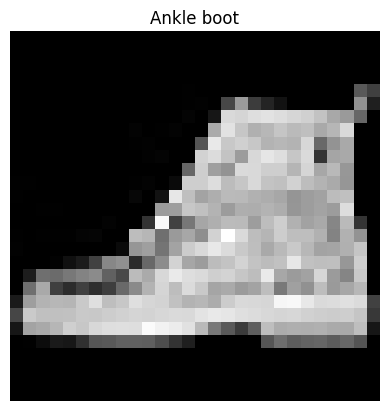

In [17]:
# Show a sample
# torch.manual_seed(42)
# fig = plt.figure(figsize=(9,9))
# rows,cols=4,4
# for i in range(1,rows*cols+1):
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
# fig.add_subplot(rows,cols,i)
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size:{img.shape}")
print(f"Labels:{label}")

## 3 . Model 0 : Build a baseline model

when starting to build a series of machine learning modelling experiments, it's best practise to start with a baseline model.

A baseline model is simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [18]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x =train_features_batch[0]
x.shape

# Flattern the sample
output = flatten_model(x)

# print out what happened
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening:{output.shape}")
28*28

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening:torch.Size([1, 784])


784

In [19]:
from torch import nn
class FashionMNISTV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x):
      return self.layer_stack(x)


In [20]:
torch.manual_seed(42)

# setup model with input parameters
model_0=FashionMNISTV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names) # one for every class

).to("cpu")

model_0

FashionMNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Setup a loss function and optimizer and evaluation metrics

* Loss function - since we're working with multiclass data our loss function will be `nn.CrossEntropyLOSS()`

* Optimizer - Our optimizer `torch.optim.SGD()`

In [22]:
import requests
from pathlib import Path

# Download helper functions from Learn Pytorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists,skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions,plot_decision_boundary

Download helper_functions.py


In [23]:
# Import aaccuracy metric
from helper_functions import accuracy_fn


# Setup loss function and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main thing you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it's runs

In [24]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  """Prints difference between start and end time. """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [25]:
start_time = timer()
end_time=timer()
print_train_time(start=start_time,end=end_time,device="cpu")

Train time on cpu: 0.000 seconds


3.937200000336816e-05

### 3.3 Creating a training loop and training model on batches of data

1. Loop through epochs.
2. Loop through training batches,perform training steps,calculate the train loss per batch
3. Loop throug testing batches,perform testing steps,calculate the test loss per batch
4. print the output
5. Time it all (for fun)

In [26]:
from tqdm.auto import tqdm

# Setup the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu=timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n-----")

  ## Training
  train_loss=0
  # Add a loop to loop through the training batches
  for batch,(X,y) in enumerate(train_dataLoader):
    model_0.train()

    # Forward pass
    y_predd = model_0(X)

    # 2 Calculate loss (per batch)
    loss = loss_fn(y_predd,y)
    train_loss+=loss # accumulate train loss

    # 3 set the zero grad
    optimizer.zero_grad()

    # 4 check the backward
    loss.backward()

    # 5 steps
    optimizer.step()


    # Print out what's happeining
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataLoader.dataset)} samples")

  # Divide total train loss by length of train dataloader
  train_loss/=len(train_dataLoader)

  ### Testing
  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataLoader:
      # 1 Forward pass
      test_pred = model_0(X_test)

      # Calculate loss (accumulatively)
      test_loss+=loss_fn(test_pred,y_test)

      # Calculate accuracy
      test_acc+=accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))

  #Calculate the test loss average per batch
    test_loss/=len(test_dataLoader)

  #calculate the test acc average per batch
    test_acc/=len(test_dataLoader)

  print(f"\n Train_loss : {train_loss:.4f} | Test loss : {test_loss:.4f} | Test acc : {test_acc:.4f} ")

# Calculate training time
train_time_end_on_cpu=timer()
total_train_time_model_0=print_train_time(start=train_time_start_on_cpu,
                                          end=train_time_end_on_cpu,
                                          device=str(next(model_0.parameters()))

                                          )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

 Train_loss : 0.5904 | Test loss : 0.5095 | Test acc : 82.0387 
Epoch:1
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

 Train_loss : 0.4763 | Test loss : 0.4799 | Test acc : 83.1969 
Epoch:2
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

 Train_loss : 0.4550 | Test loss : 0.4766 | Test acc : 83.4265 
Train time on Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.000

## 4 . Make predictions and get Model 0 results

In [27]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device:torch.device
               ):
  """Returns a dictionary containing the results of model predicting on data_loader."""

  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # Make our data device agnostic code
      X,y = X.to(device), y.to(device) # Use current_device here
      # Make predictions
      y_pred=model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                       y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss/=len(data_loader)

    acc/=len(data_loader)

    return {"model_name":model.__class__.__name__,
            "model_loss":loss.item(),
            "model_acc":acc
            }



## 5 . Setup device agnostic-code (for using a GPU if there is one)



In [28]:
torch.cuda.is_available()

True

In [29]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6 . Model 1 : Building a better model with non-linearity


In [30]:
# Create a model with linear and non-linear data
class FashionMNISTV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int
              ):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape
                  ),
        nn.ReLU()
    )

  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)

In [31]:
# Create an instnce of model_1
torch.manual_seed(42)
model_1=FashionMNISTV1(input_shape=784,
                       hidden_units=10,
                       output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss,optimizer and evaluation metrics

In [32]:
from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss() # measure how wrong our model is

optimizer=torch.optim.SGD(params=model_1.parameters(), # tries to update our model's parameters to reduce the loss
                          lr=0.1)

### 6.2 Functionnizing training and evaluation/testing loop
Let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [33]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc=0,0

  # Put model into training model
  model.train()

  ### Training
  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(data_loader):
    # Put data on target device
    X,y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred=model(X)

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1) # got from logits -> prediction labels
                            )

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4 Loss backward
    loss.backward()

    # 5 Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch*len(X)}/{len(data_loader.dataset)} samples.")

  # Divide total train loss and acc by lenght of train dataloader
  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  return train_loss, train_acc

  print(f"Train_loss:{train_loss:.5f} | Train_acc:{train_acc:.2f}% ")

In [34]:
def test_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device = device
    ):
      # Perform a testing loop step on model going over data_loadrer
    test_loss, test_acc = 0.0, 0.0

    # Put the model in eval mode
    model.eval()

    #Turn on inference mode context manager

    with torch.inference_mode():
        for X, y in data_loader:

          # Send the data to the target device
            X, y = X.to(device), y.to(device)

            # 1 Forward pass (outputs raw logits)
            y_pred_test = model(X)
            loss = loss_fn(y_pred_test, y)

            # 2 calculate the loss/acc
            test_loss += loss.item()
            test_acc += accuracy_fn(
                y_true=y,
                y_pred=y_pred_test.argmax(dim=1) # go from logits-> preditction labels
            )
  # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"test loss :{test_loss:.5f} | Test acc:{test_acc:.2f}%")

    return test_loss, test_acc


In [35]:
torch.manual_seed(42)


#Measure time
from timeit import default_timer as timer
train_time_start_on_gpu=timer()
# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n-------")
  train_step(model=model_1,
             data_loader=train_dataLoader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device
             )

  test_step(model=model_1,
            data_loader=test_dataLoader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device
            )

train_time_end_on_gpu=timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
test loss :0.95637 | Test acc:65.00%
Epoch:1
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
test loss :0.72227 | Test acc:73.91%
Epoch:2
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
test loss :0.68500 | Test acc:75.02%
Train time on cuda: 27.150 seconds


**Note:** Sometimes,depending on your data/hardware you might find that your model trains faster on CPU than GPU

Reasons:

1) It could be that the overhead for copying data/model to and from the GPU
outweighs the compute benefits offered by the GPU.

2) The harware you're using has a better CPU in terms compute capability than the GPU



In [36]:
# Train time on cpu
total_train_time_model_0


27.149933892999982

In [37]:
model_0.to(device)
model_0_results=eval_model(
                           model=model_0,
                           data_loader=test_dataLoader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device
                           )
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.4766389727592468,
 'model_acc': 83.42651757188499}

In [38]:
# Train time on cpu
total_train_time_model_0

27.149933892999982

In [39]:
# Get model_1 results dictionary

model_1_results=eval_model(
                           model=model_1,
                           data_loader=test_dataLoader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device
                          )
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [40]:
model_0.to(device)
model_0_results=eval_model(model=model_0,
                           data_loader=test_dataLoader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device
                           )
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.4766389727592468,
 'model_acc': 83.42651757188499}

In [41]:
# Get model_1 results dictionary

model_1_results=eval_model(model=model_1,
                           data_loader=test_dataLoader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device
                          )
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## 7  Model 2 : Building a Convolutional Neural Networks

CNN's are also known ConvNets

CNN's are known for their capabilities to find patterns in visual data

Conv2d


In [42]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architechture that replicates the TinyVGG
  model from CNN explainer website,
  """

  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1 # Values we can set ouselves in out NN's are called hyperparameters
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # there's a trick to calcuating this
                  out_features=output_shape
                  )

    )

  def forward(self,x):
    x=self.conv_block_1(x)
    # print(f"Output shape of con_block_!:{x.shape}")

    x=self.conv_block_2(x)
    # print(f"Output shape of conv_block_2:{x.shape}")

    x=self.classifier(x)
    # print(f"Output shape off classifier:{x.shape}")
    return x


In [43]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)




In [44]:
rand_image_tensor=torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [45]:
#  Pass image through modell
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

In [46]:
torch.manual_seed(42)

# Create a batch of images
images=torch.randn(size=(32,3,64,64))
test_image=images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [47]:
test_image.shape

torch.Size([3, 64, 64])

In [48]:
torch.manual_seed(42)
# Create a ssingle conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1


                       )
#Conv2d documentation refer


# Pass the data through the convoutional layer
conv_output=conv_layer(test_image.unsqueeze(0))
conv_output.shape



torch.Size([1, 10, 64, 64])

### 7.3 Setup of loss function and optimizer for model_2

In [49]:
# Setup loss function/eval metrics/optimzer
from helper_functions import accuracy_fn

loss_fn= nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1
                            )

### 7.4 Training andd testing `model_2` using our training and test functions

In [50]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2=timer()

# Train and Test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n---------")

  train_step(model=model_2,
             data_loader=train_dataLoader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device
             )

  test_step(model=model_2,
            data_loader=test_dataLoader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device
            )

train_time_end_model_2=timer()
total_train_time_model_2=print_train_time(start=train_time_start_model_2,
                                          end=train_time_end_model_2,
                                          device=device
                                          )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
test loss :0.39741 | Test acc:85.65%
Epoch:1
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
test loss :0.35601 | Test acc:86.91%
Epoch:2
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
test loss :0.32541 | Test acc:88.22%
Train time on cuda: 47.702 seconds


In [51]:
# Get model_2 result
model_2_results=eval_model(
    model=model_2,
    data_loader=test_dataLoader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3254113495349884,
 'model_acc': 88.21884984025559}

In [52]:
model_0_results

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.4766389727592468,
 'model_acc': 83.42651757188499}

In [53]:
model_1_results

{'model_name': 'FashionMNISTV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## 8 . Comparing model results and training time

In [54]:
import pandas as pd
compare_results=pd.DataFrame([model_0_results,
                              model_1_results,
                              model_2_results

                              ])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTV0,0.476639,83.426518
1,FashionMNISTV1,0.685001,75.019968
2,FashionMNISTModelV2,0.325411,88.218850


In [55]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2
                                   ]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTV0,0.476639,83.426518,27.149934
1,FashionMNISTV1,0.685001,75.019968,27.149934
2,FashionMNISTModelV2,0.325411,88.218850,47.701598


### Viualize our model results


Text(0, 0.5, 'model')

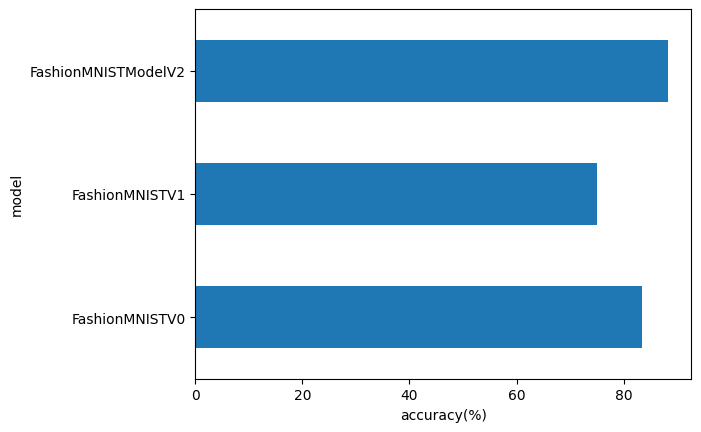

In [56]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model")

## 9 . Make and evaluate random predictions with best model

In [57]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):

  pred_probs = []
  model.to(device)

  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimenstion and pass to target device)
      sample = torch.unsqueeze(sample,dim=0).to(device)

      # Forward pass (model) outputs raw logits
      pred_logit = model(sample)

      # Get prediction probability (logit-> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)


In [58]:
img,label = test_data[0][:10]
img.shape, label


(torch.Size([1, 28, 28]), 9)

In [59]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Coat')

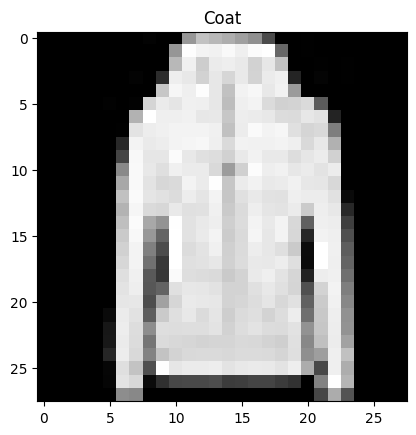

In [60]:
plt.imshow(test_samples[3].squeeze(),cmap="gray")
plt.title(class_names[test_labels[3]])

In [61]:
# make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples
                              )
# View first two prediction probabilities
pred_probs[:2]

tensor([[5.3227e-07, 2.5544e-08, 3.3109e-08, 4.1503e-07, 1.5130e-08, 9.9986e-01,
         3.5510e-07, 1.7345e-05, 3.8996e-05, 8.6296e-05],
        [3.2760e-02, 5.7199e-01, 3.1617e-03, 1.7457e-01, 1.0596e-01, 2.1557e-04,
         1.1029e-01, 3.0890e-04, 4.6511e-04, 2.7912e-04]])

In [62]:
test_labels # compare pred_probs with test_labes for apples to apples

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [63]:
# Convert prediction probailities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

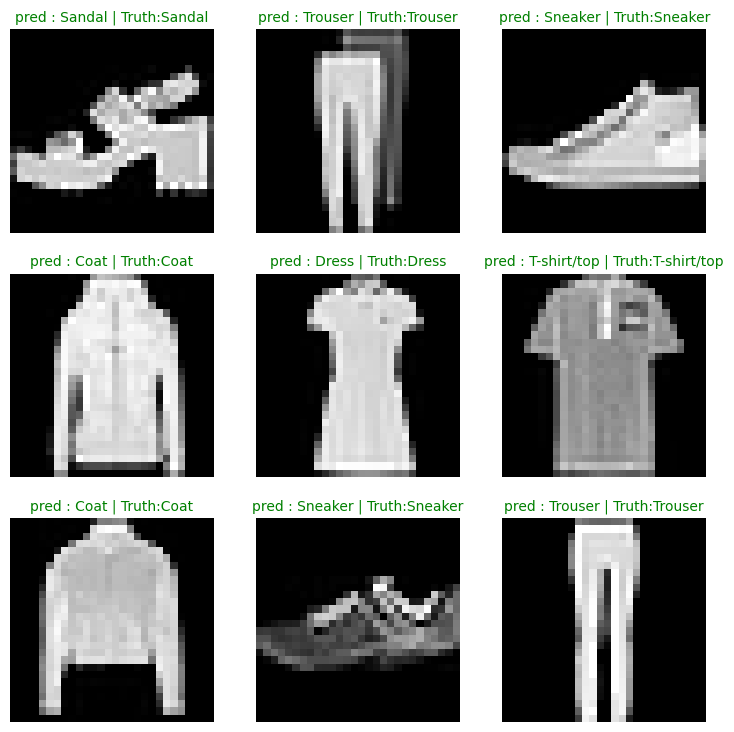

In [64]:
# Plot the predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in  enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows,ncols,i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(),cmap="gray")

  # Find the prediction(in text form, eg "sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"pred : {pred_label} | Truth:{truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,c="g") # green text if prediction same as truth
  else:
    plt.title(title_text,fontsize=10,c="r")


  plt.axis(False)


In [65]:
!nvidia-smi

Sun Dec 28 16:57:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   62C    P0             31W /   70W |     186MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 10 .  Confusion Matrix

making prediction on further evaluation
A confusion matrix is a fantastic way of evaluating your classification models visually

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix`

In [74]:
import mlxtend
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataLoader,desc="Making predictions...."):
    # Send the data and targets to target device
    X,y = X.to(device) , y.to(device)
    # Do the forward pass
    y_logit=model_2(X)
    #Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred=torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
print(y_preds)
y_pred_tensor =torch.cat(y_preds)
y_pred_tensor[:10]


Making predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 8, 3, 4, 3, 2, 6, 8, 0, 2, 5, 7, 5,
        1, 6, 6, 0, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 9, 6, 7, 2, 1, 4, 6, 2, 2, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 3, 3, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 3, 8, 5, 9, 5, 0, 3, 2,
        0, 6, 5, 3, 6, 7, 3, 8]), tensor([6, 1, 6, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8,
        0, 0, 8, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 9, 1, 8, 6, 2, 1, 2, 8, 1, 6, 0, 0, 4, 6, 1, 3, 2, 2, 2, 4,
        1, 4, 5, 6, 4, 7, 9, 3]), tensor([7, 2, 3, 8, 0, 9, 4, 8, 4, 2, 6, 5, 6, 1, 2, 1, 3, 6, 8, 1, 0, 9, 3, 6,
        7, 9, 8, 4, 4, 7, 1, 2]), tensor([3, 2, 3, 6, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 6, 4, 1, 6, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 6, 0]), tensor([7, 7, 6, 3, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 3, 2, 5, 4, 9, 2, 4, 8, 6, 4,
        3, 2, 9, 7, 3, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 6, 0, 6, 3, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 3, 7, 4,
       

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [68]:
# See if required packages are installed and if not, instal them....
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version:{mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1])>=19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version:{mlxtend.__version__}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 56.8 MB/s eta 0:00:00
mlxtend version:0.23.4


In [72]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [76]:
y_pred_tensor[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [78]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

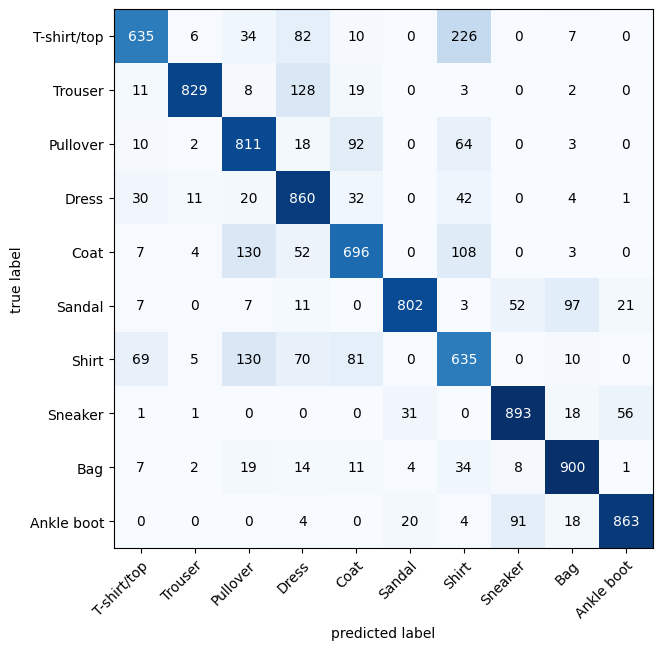

In [83]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2.  setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task="Multiclass",num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                       target=test_data.targets
                       )
# 3. Plot the confusion matrix
fig , ax = plot_confusion_matrix(
     conf_mat = confmat_tensor.numpy(),
     class_names = class_names,
     figsize=(10,7)

)


## 11 .Saving and reloading our model

In [85]:
from pathlib import Path

# Create model directory path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model PATH
MODEL_NAME="03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME

# save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH
           )

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [89]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape = 1,
                                     hidden_units=10,
                                     output_shape=len(class_names)
                                     )

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [90]:
model_2_results # compare this evaluation

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3254113495349884,
 'model_acc': 88.21884984025559}

In [95]:
# Evaluate the loaded model
torch.manual_seed(42)

loaded_model_2_results=eval_model(
    model=loaded_model_2,
    data_loader=test_dataLoader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3254113495349884,
 'model_acc': 88.21884984025559}

In [98]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08
              )

tensor(True)